In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
corpus=[]
target=[]
edad=[]
sexo=[]
severidad=[]
archivo=open("dataset_elpino.csv",encoding="utf-8")
header=archivo.readline().strip().split(";")
features=[]
for col in header:
    col=col.split("-")[0].strip()
    if col.startswith("Diag") or col.startswith("Proc"):
        col=col.split(" ")
        col=col[0]+col[1]
    features.append(col)
for linea in archivo:
    row=[]
    linea=linea.strip().split(";")
    for i in range(len(linea)):
        col=linea[i].split("-")[0].strip()
        if i==67:
            grd=col
            #target.append(grd[-1])
            target.append(grd)
        elif i==66:
            sexo.append(1 if col=="Mujer" else 0)
        elif i==65:
            edad.append(int(col))
        else:
            row.append(col)
    corpus.append(row)

In [70]:
corpus[0]

['A41.8',
 'B37.6',
 'I39.8',
 'N10',
 'B96.1',
 'L89.9',
 'L08.9',
 'B96.2',
 'A41.5',
 'J86.9',
 'U07.1',
 'Y95',
 'N18.5',
 'E87.1',
 'D64.9',
 'G82.2',
 'N31.9',
 'I10',
 'K70.4',
 'F19.2',
 'F10.2',
 'E46',
 'G40.9',
 'L21.9',
 'Z93.5',
 'Z93.3',
 'Z99.2',
 'Z91.6',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '86.28',
 '34.91',
 '88.38',
 '87.41',
 '88.75',
 '88.01',
 '88.43',
 '88.41',
 '87.44',
 '99.29',
 '99.19',
 '99.18',
 '99.21',
 '99.26',
 '99.23',
 '93.94',
 '89.52',
 '90.59',
 '89.65',
 '39.95',
 '39.95',
 '99.04',
 '90.39',
 '99.84',
 '88.72',
 '90.42',
 '90.52',
 '91.39',
 '91.33',
 '87.03']

In [71]:
features

['Diag01',
 'Diag02',
 'Diag03',
 'Diag04',
 'Diag05',
 'Diag06',
 'Diag07',
 'Diag08',
 'Diag09',
 'Diag10',
 'Diag11',
 'Diag12',
 'Diag13',
 'Diag14',
 'Diag15',
 'Diag16',
 'Diag17',
 'Diag18',
 'Diag19',
 'Diag20',
 'Diag21',
 'Diag22',
 'Diag23',
 'Diag24',
 'Diag25',
 'Diag26',
 'Diag27',
 'Diag28',
 'Diag29',
 'Diag30',
 'Diag31',
 'Diag32',
 'Diag33',
 'Diag34',
 'Diag35',
 'Proced01',
 'Proced02',
 'Proced03',
 'Proced04',
 'Proced05',
 'Proced06',
 'Proced07',
 'Proced08',
 'Proced09',
 'Proced10',
 'Proced11',
 'Proced12',
 'Proced13',
 'Proced14',
 'Proced15',
 'Proced16',
 'Proced17',
 'Proced18',
 'Proced19',
 'Proced20',
 'Proced21',
 'Proced22',
 'Proced23',
 'Proced24',
 'Proced25',
 'Proced26',
 'Proced27',
 'Proced28',
 'Proced29',
 'Proced30',
 'Edad en años',
 'Sexo (Desc)',
 'GRD']

In [72]:
df=pd.DataFrame(corpus,columns=features[:-3])
df["GRD"]=target

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diag01    14561 non-null  object
 1   Diag02    14561 non-null  object
 2   Diag03    14561 non-null  object
 3   Diag04    14561 non-null  object
 4   Diag05    14561 non-null  object
 5   Diag06    14561 non-null  object
 6   Diag07    14561 non-null  object
 7   Diag08    14561 non-null  object
 8   Diag09    14561 non-null  object
 9   Diag10    14561 non-null  object
 10  Diag11    14561 non-null  object
 11  Diag12    14561 non-null  object
 12  Diag13    14561 non-null  object
 13  Diag14    14561 non-null  object
 14  Diag15    14561 non-null  object
 15  Diag16    14561 non-null  object
 16  Diag17    14561 non-null  object
 17  Diag18    14561 non-null  object
 18  Diag19    14561 non-null  object
 19  Diag20    14561 non-null  object
 20  Diag21    14561 non-null  object
 21  Diag22    14

In [74]:
df["GRD"].value_counts()[:20]

GRD
146101    813
146121    639
146131    538
158171    389
134161    325
071141    317
044153    287
061131    252
041023    248
146102    244
044163    229
131111    226
131201    222
054123    204
146122    187
146103    163
061201    154
044183    145
146132    140
131301    139
Name: count, dtype: int64

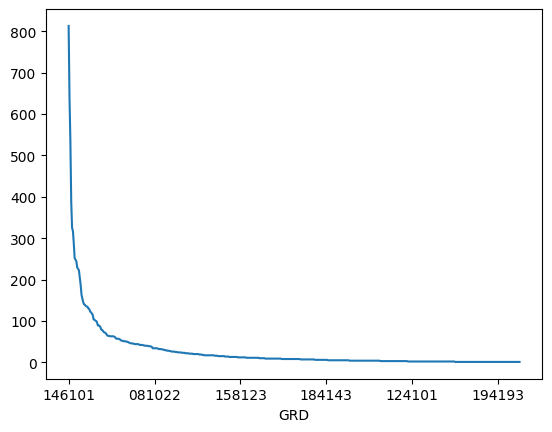

In [75]:
df["GRD"].value_counts().plot();

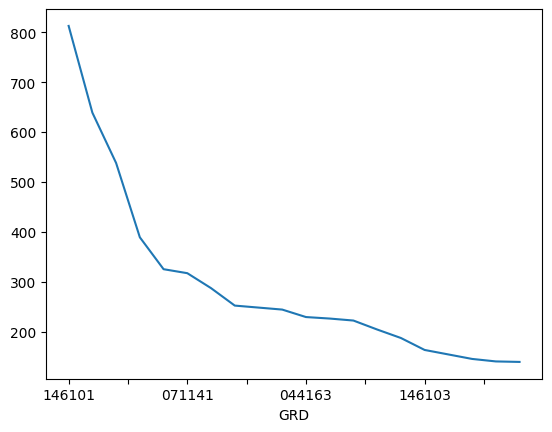

In [76]:
df["GRD"].value_counts()[:20].plot();

In [77]:
filtro=(df["GRD"]=='146101') | (df["GRD"]=='146102') | (df["GRD"]=='146103')

In [78]:
df[filtro]

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced22,Proced23,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,GRD
38,O32.1,O42.1,O82.0,O34.0,O98.1,A53.9,O99.3,F12.2,O99.2,E66.9,...,,,,,,,,,,146102
100,O61.0,O82.1,O24.4,O26.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,,...,,,,,,,,,,146101
111,O34.2,O82.1,O24.4,O26.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,,...,,,,,,,,,,146101
139,O14.0,O66.4,O82.1,O26.0,Z35.3,Z64.0,Z88.6,Z37.0,Z38.0,Z39.0,...,,,,,,,,,,146101
141,O61.0,O82.1,O99.2,E66.9,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,,...,,,,,,,,,,146101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14534,O61.0,O82.1,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,Z35.1,Z92.4,,...,,,,,,,,,,146102
14535,O61.0,O82.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,Z88.0,,,...,,,,,,,,,,146101
14538,O82.0,O99.0,O10.0,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,O62.2,,...,,,,,,,,,,146102
14539,O60.1,O82.1,O30.0,O99.2,E66.9,Z37.0,Z38.0,Z39.0,Z39.1,Z39.2,...,,,,,,,,,,146101


In [79]:
pd.crosstab(df[filtro]["GRD"],df["Diag01"],margins=True)

Diag01,O03.9,O06.3,O10.0,O10.9,O11,O13,O14.0,O14.1,O14.2,O14.9,...,O98.4,O98.5,O99.0,O99.2,O99.3,O99.5,O99.6,O99.8,Z35.4,All
GRD,,,,,,,,,,,,,,,,,,,,,
146101,0,1,5,2,14,9,5,22,3,2,...,1,0,2,1,0,0,0,1,1,813
146102,1,0,0,0,1,4,4,14,2,1,...,0,0,1,1,1,1,0,0,0,244
146103,0,0,0,0,4,0,0,23,2,1,...,0,35,0,0,0,0,1,0,0,163
All,1,1,5,2,19,13,9,59,7,4,...,1,35,3,2,1,1,1,1,1,1220


In [80]:
data=df[filtro]

In [81]:
features_procedimientos=[]
features_diagnosticos=[]
for j in range(1,36):
    field="Diag"+str(j).zfill(2)
    features_diagnosticos.append(field)
for j in range(1,31):
    field="Proced"+str(j).zfill(2)
    features_procedimientos.append(field)

In [82]:
procedimientos={}
diagnosticos={}
for i, row in data.iterrows():
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        if row[field] not in diagnosticos:
            diagnosticos[row[field]]=1
        else:
            diagnosticos[row[field]]+=1
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        if row[field] not in procedimientos:
            procedimientos[row[field]]=1
        else:
            procedimientos[row[field]]+=1
token_diagnosticos=list(diagnosticos.keys())
token_procedimientos=list(procedimientos.keys())
vocabulario=len(token_diagnosticos)+len(token_procedimientos)+1
print("Diagnósticos: ",len(token_diagnosticos))
print("Procedimientos: ",len(token_procedimientos))
print("Vocabulario: ",vocabulario)

Diagnósticos:  377
Procedimientos:  155
Vocabulario:  533


In [83]:
token_rows=[]
for i, row in data.iterrows():
    token_row=[]
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        token_row.append(1+token_diagnosticos.index(row[field]))
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        token_row.append(1+377+token_procedimientos.index(row[field]))
    token_rows.append(token_row)


In [84]:
df_modelo = df.copy()

In [85]:
columnas_diag = [col for col in df.columns if col.startswith("Diag")]
columnas_proced = [col for col in df.columns if col.startswith("Proced")]

df_diag_codigos = df[columnas_diag].map(extraer_codigo)
df['diag_principal'] = df_diag_codigos['Diag 01 Principal (cod+des)']

NameError: name 'extraer_codigo' is not defined

In [ ]:
for i in range(3):
    df_modelo[f'proced_{i+1}'] = df_modelo['procedimientos_lista'].apply(lambda x: x[i] if len(x) > i else None)

le_diag = LabelEncoder()
df_modelo['diag_principal_enc'] = le_diag.fit_transform(df_modelo['diag_principal'])

for i in range(3):
    df_modelo[f'proced_{i+1}_enc'] = LabelEncoder().fit_transform(df_modelo[f'proced_{i+1}'].astype(str))
    
le_grd = LabelEncoder()
df_modelo['GRD_enc'] = le_grd.fit_transform(df_modelo['GRD'].astype(str))

In [ ]:
X = df_modelo[['diag_principal_enc', 'proced_1_enc', 'proced_2_enc', 'proced_3_enc']]
y = df_modelo['GRD_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_grd.classes_))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_grd.classes_, yticklabels=le_grd.classes_, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()